In [15]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import importlib


In [16]:
import os
os.getcwd()

'/Users/amauss/GitHub/hemibrain'

In [17]:
import functions_module as f
importlib.reload(f)


<module 'functions_module' from '/Users/amauss/GitHub/hemibrain/functions_module.py'>

## Load cell bodyIDs and names

In [18]:
LP_cells_ids_labels = pd.read_excel('neuron_bodyIds_names/LP_cells_ids_labels.xlsx')

In [19]:
LP_cells_ids_labels.head()

,Unnamed: 0,bodyId,type,name
0,0,1715446521,T4c,T4c_0
1,1,2306474951,T4c,T4c_1
2,2,2148597697,T4c,T4c_2
3,3,5813034662,T4c,T4c_3
4,4,1465466258,T4c,T4c_4


## Analyse proportial input to each cell and cell type

In [20]:
input_to_LPi34 = f.check_proportional_input(LP_cells_ids_labels, 'LPi34')

postsynaptic cell type: LPi34
number of postsynaptic cells: 10
number of connections found: 785
number of unique presynaptic cells: 545

number of unique presynaptic T4c cells: 67
number of unique presynaptic T5c cells: 68
number of unique presynaptic T4d cells: 34
number of unique presynaptic T5d cells: 22
number of unique presynaptic VS cells: 3
number of unique presynaptic layer3_LPTC cells: 0
number of unique presynaptic unknown cells: 339

input weight grouped by presynaptic type
type_pre
LPi43        78
T4c         690
T4d          53
T5c         785
T5d          39
VS            3
unknown    1060
Name: weight, dtype: int64


In [21]:
input_to_LPi43 = f.check_proportional_input(LP_cells_ids_labels, 'LPi43')

postsynaptic cell type: LPi43
number of postsynaptic cells: 13
number of connections found: 711
number of unique presynaptic cells: 560

number of unique presynaptic T4c cells: 34
number of unique presynaptic T5c cells: 34
number of unique presynaptic T4d cells: 75
number of unique presynaptic T5d cells: 53
number of unique presynaptic VS cells: 3
number of unique presynaptic layer3_LPTC cells: 0
number of unique presynaptic unknown cells: 347

input weight grouped by presynaptic type
type_pre
LPi34       27
LPi43       12
T4c         69
T4d        259
T5c         59
T5d        223
VS           3
unknown    678
Name: weight, dtype: int64


In [22]:
input_to_T5c = f.check_proportional_input(LP_cells_ids_labels, 'T5c')

postsynaptic cell type: T5c
number of postsynaptic cells: 68
number of connections found: 2625
number of unique presynaptic cells: 1174

number of unique presynaptic T4c cells: 60
number of unique presynaptic T5c cells: 59
number of unique presynaptic T4d cells: 9
number of unique presynaptic T5d cells: 18
number of unique presynaptic VS cells: 1
number of unique presynaptic layer3_LPTC cells: 1
number of unique presynaptic unknown cells: 1012

input weight grouped by presynaptic type
type_pre
LPi34             9
LPi43            24
T4c             222
T4d               9
T5c             270
T5d              27
VS                1
layer3_LPTC       1
unknown        4616
Name: weight, dtype: int64


In [23]:
input_to_T5c = f.check_proportional_input(LP_cells_ids_labels, 'T5c', restrict_to_LOP=True)

Analysis restricted to Lobula Plate!

postsynaptic cell type: T5c
number of postsynaptic cells: 68
number of connections found: 2625
number of unique presynaptic cells: 1174

number of unique presynaptic T4c cells: 60
number of unique presynaptic T5c cells: 59
number of unique presynaptic T4d cells: 9
number of unique presynaptic T5d cells: 18
number of unique presynaptic VS cells: 1
number of unique presynaptic layer3_LPTC cells: 1
number of unique presynaptic unknown cells: 1012

input weight grouped by presynaptic type
type_pre
LPi34             9
LPi43            24
T4c             222
T4d               9
T5c             232
T5d               8
VS                1
layer3_LPTC       1
unknown        1384
Name: LOP_weight, dtype: int64


## Plot grouped inputs

In [24]:
def plot_grouped(output_dict, **kwargs):

    kwarguments = {"plot_percent_bool": False}
    kwarguments.update(kwargs)
    plot_percent_bool = kwarguments["plot_percent_bool"]
    
    results_grouped = output_dict["results_grouped"]
    individual_post_cell_grouped = output_dict["individual_post_cell_grouped"]
    individual_post_cell_bodyId = output_dict["individual_post_cell_bodyId"]
    cell_type_post = output_dict["cell_type_post"]
    name_post_list = output_dict["name_post_list"]
    
    print('Cell type: {}'.format(cell_type_post))
    n_cells = len(individual_post_cell_bodyId)
    print('n cells: {}'.format(n_cells))

    max_cell_num = 16
    
    nrows = 5
    ncols = 3
    
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 18))
    
    if plot_percent_bool:
        results_grouped = results_grouped/results_grouped.sum()*100
        results_grouped.plot.bar(color='k', ax=axes[0,0])        
        axes[0,0].set_ylabel('synaptic input (%)')
    else:
        results_grouped.plot.bar(color='k', ax=axes[0,0])
        axes[0,0].set_ylabel('synaptic input (weight)')
        
    axes[0,0].set_xticklabels(list( results_grouped.index ), rotation=30, ha='right')
    axes[0,0].set_title('all {} cells'.format(cell_type_post))
    axes[0,0].get_legend().remove()
    
    
    for i, grouped_i in enumerate(individual_post_cell_grouped):
        ax = fig.axes[1+i]
        
        if plot_percent_bool:
            grouped_i = grouped_i/grouped_i.sum()*100
            grouped_i.plot.bar(color=(0.5, 0.5, 0.5), edgecolor='k', ax=ax)
            ax.set_ylabel('synaptic input (%)')
        else:   
            grouped_i.plot.bar(color=(0.5, 0.5, 0.5), edgecolor='k', ax=ax)
            ax.set_ylabel('synaptic input (weight)')
        
        bodyId_i = individual_post_cell_bodyId[i]
        name_post_i = name_post_list[i]
        ax.set_xticklabels(list( grouped_i.index ), rotation=30, ha='right')
        ax.get_legend().remove()
        
        ax.set_title('{} ({})'.format(name_post_i, bodyId_i))        
        
    for j in range(i+1, nrows*ncols-1):
        fig.axes[1+j].axis('off')
    
    
    fig.tight_layout()
    
    return fig


Cell type: LPi34
n cells: 10


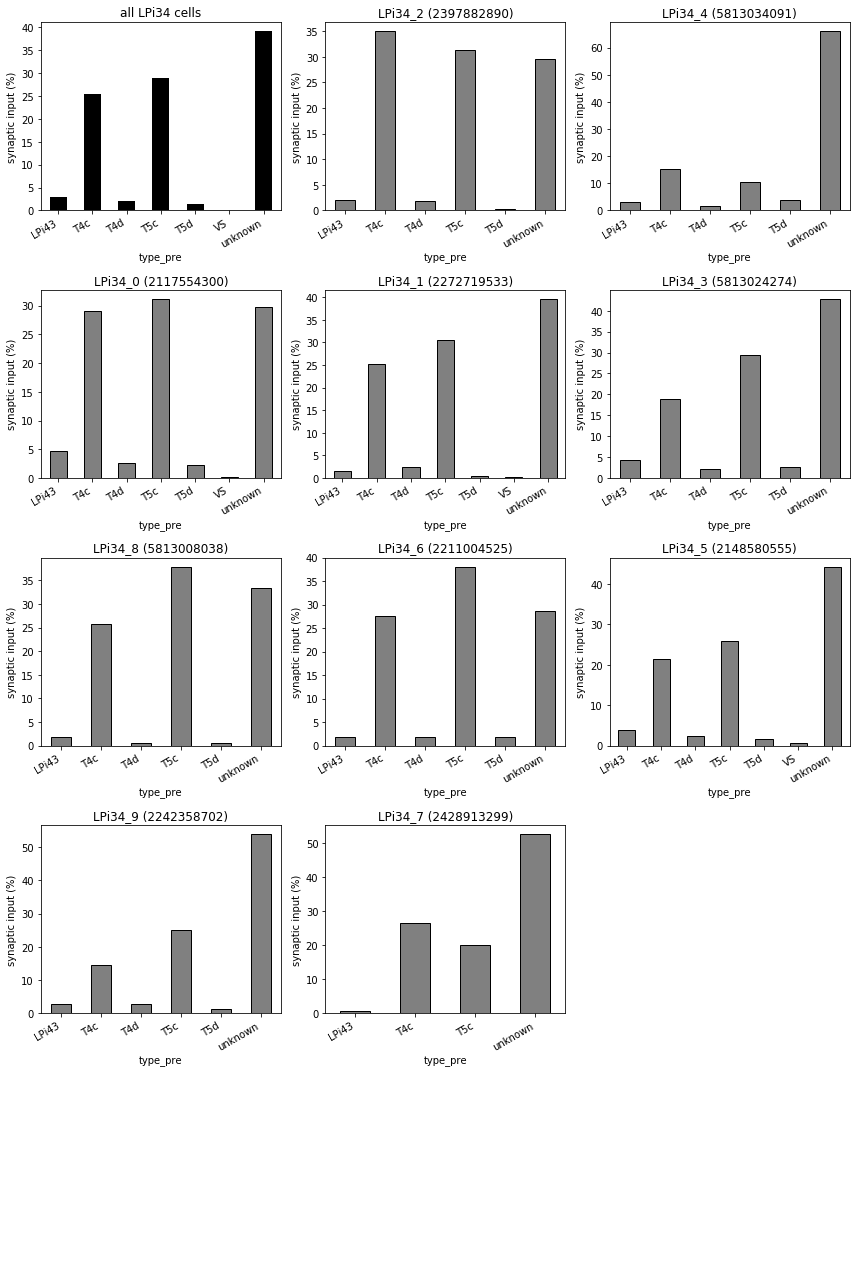

In [25]:
fig = plot_grouped(input_to_LPi34, plot_percent_bool=True)
plt.savefig('plots_Ammer_et_al/Figure_inputs_grouped_by_type_percent_LPi34.png', dpi=300)


Cell type: LPi34
n cells: 10


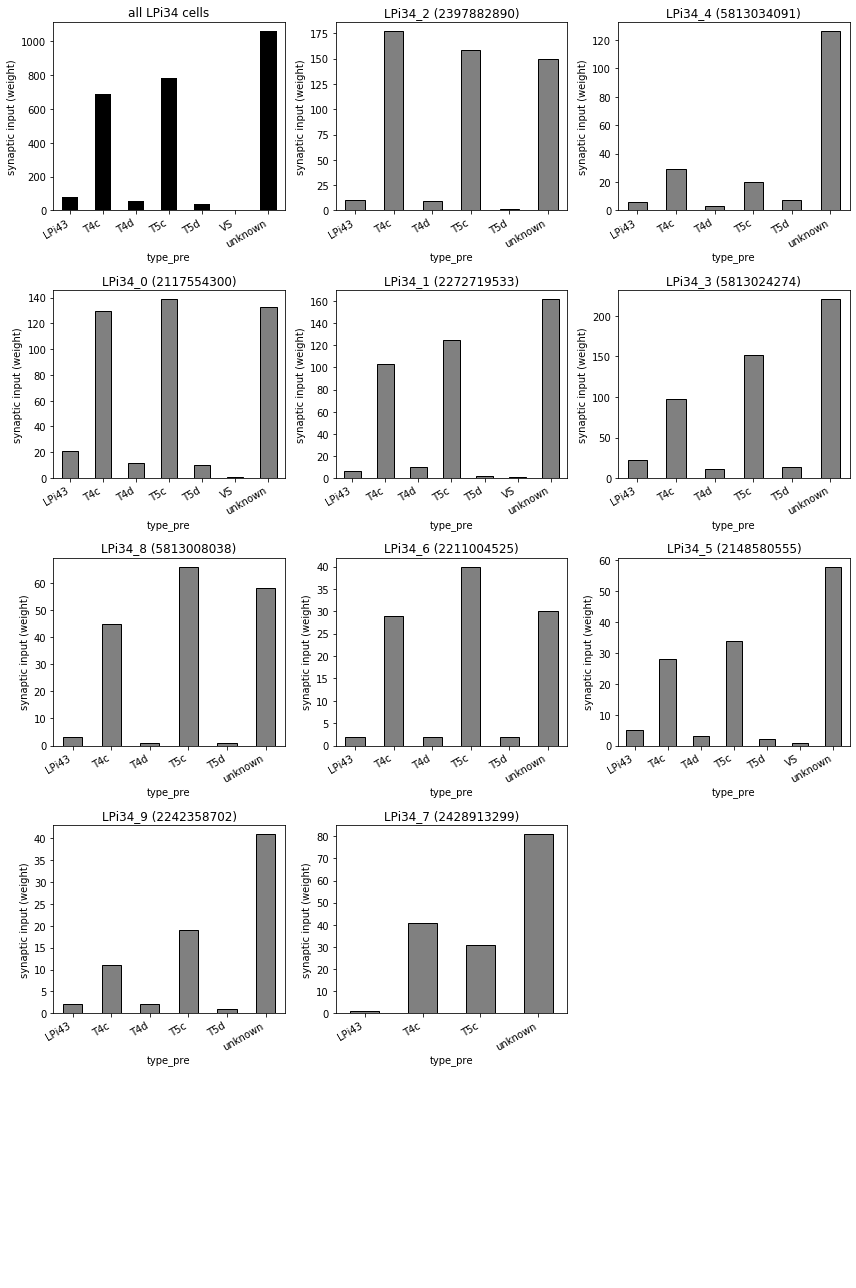

In [26]:
fig = plot_grouped(input_to_LPi34, plot_percent_bool=False)
plt.savefig('plots_Ammer_et_al/Figure_inputs_grouped_by_type_weight_LPi34.png', dpi=300)


Cell type: LPi43
n cells: 13


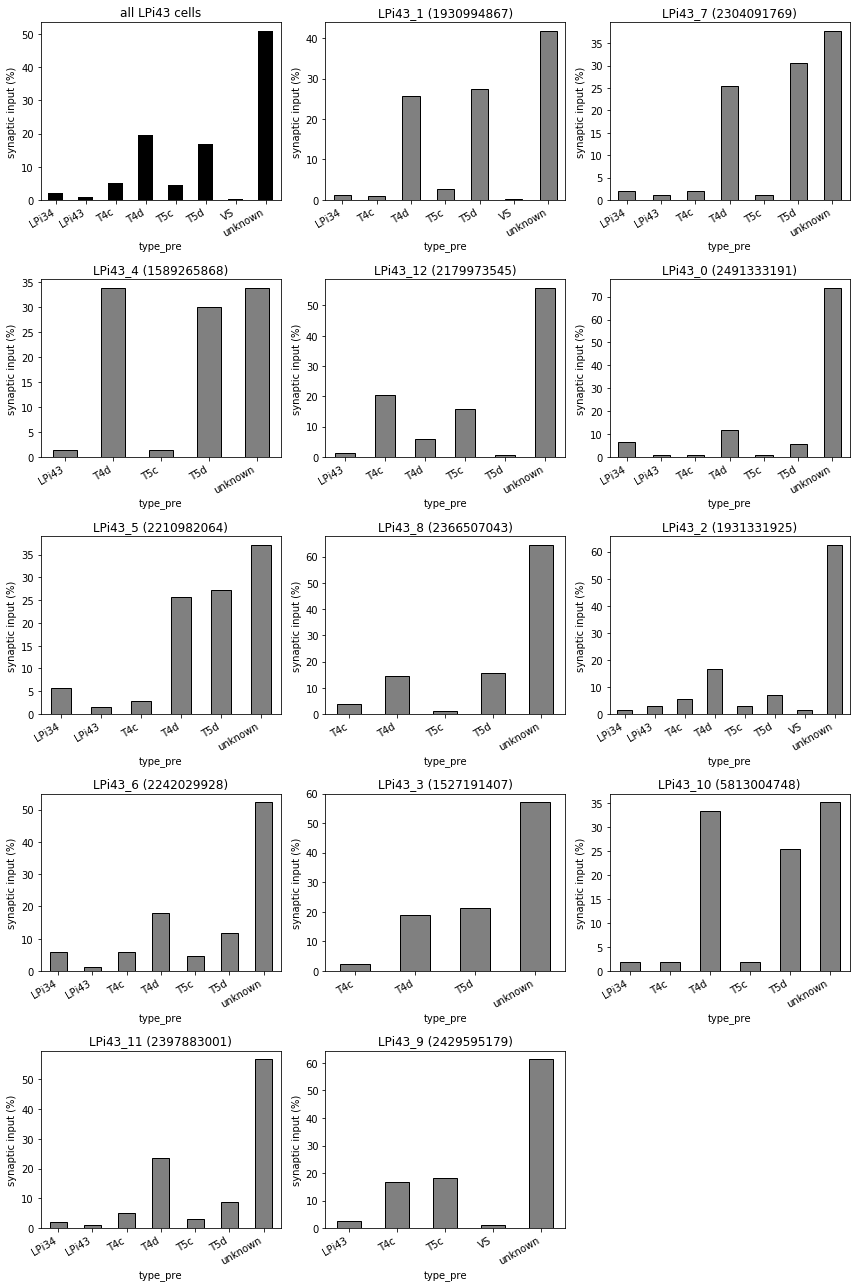

In [27]:
fig = plot_grouped(input_to_LPi43, plot_percent_bool=True)
plt.savefig('plots_Ammer_et_al/Figure_inputs_grouped_by_type_percent_LPi43.png', dpi=300)


Cell type: LPi43
n cells: 13


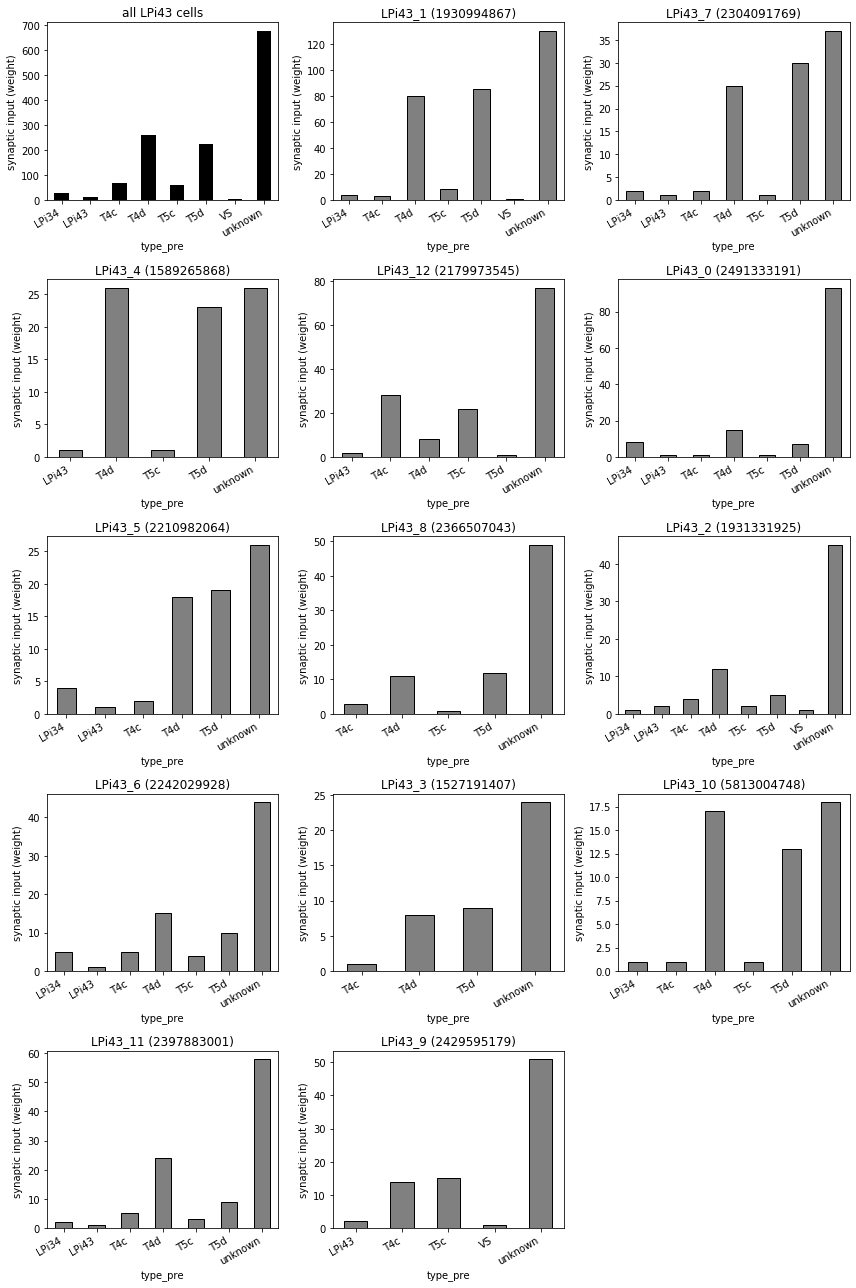

In [28]:
fig = plot_grouped(input_to_LPi43, plot_percent_bool=False)
plt.savefig('plots_Ammer_et_al/Figure_inputs_grouped_by_type_weight_LPi43.png', dpi=300)

